# Visualizing relationships between categorical features - A machine learning perspective

While understanding aspects of a single feature can be very helpful, we're often more interested in relationships between features.



In [2]:
import pandas as pd

df = pd.read_csv('assets/titanic_passengers.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In data science, we sometimes have a single feature that we are most interested in predicting.  We typically call that feature the **target**.  

**If you had to pick a single target feature from the Titanic data set, which one would it be?**
I would probably look at age.

## Survival of the sinking of the Titanic

Were women and children really the first on the lifeboats?  Was it as bad for 3rd class passengers in real life as it was in the movie?  Let's explore the relationship between sex and survival.  Later you'll have an opportunity to look at the relationship between passenger class and survival.  Note that survived = 0 means the passenger didn't survive and survived = 1 means the passenger did survive.  Also note that this dataset was developed before the modern understanding of sex and gender so the labeling of sex as male and female is outdated, but it's what we've got.

## Cross-tabulations

One useful - if less visually appealing - way to look at the relationship between passenger sex and survival is by making a cross-tabulation or cross-tab.

In [4]:
#cross-tab of passenger sex survival


pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


The cross-tabulation shows the number of individuals in each of the four categories created by sex and survival.  There were 81 female passengers who did not survive and 233 female passengers who did survive.  There were 468 male passengers who did not survive adn 109 male passengers who did survive.  

We can switch the order of the features in the cross-tab and see the same relationships but with the rows and columns flipped.

In [6]:
#cross-tab of passenger sex and survival

pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


## Relative Frequency

The relative frequency of something happening is another way of saying the percent of time that it happens.  We can calculate the relative frequency of `Survived` and `Sex` for the Titanic passnegers by specifying `normalize=True` in our cross_tab statement and multiplying the whole statement by 100.  Part of the magic of a Pandas DataFrame is that this will multiply each entry in cross_tab by 100.

In [8]:
#Calculate the cross-tab - note normalize=True
pd.crosstab(df['Survived'],df['Sex'], normalize=True)*100

Sex,female,male
Survived,,
0,9.090909,52.525253
1,26.150393,12.233446


## Stacked Bar Charts

From the cross-tabs, it's pretty easy to see that more women survived than perished and more men perished than survived.  However, we can also display this data using a stacked bar chart.

To begin, we'll save our cross-tab as its own Pandas DataFrame named cross_tab.

In [10]:
#calculate the cross-tab
cross_tab = pd.crosstab(df['Sex'],df['Survived'])

#Save it to its own dataframe using .DataFrame method
cross_tab_df=pd.DataFrame(cross_tab)

cross_tab_df

Survived,0,1
Sex,,
female,81,233
male,468,109


We can then use the built-in plotting features of Pandas to create a stacked barplot.  

Let's make sure that we give the plot a good title and labels.

<Axes: title={'center': 'Titanic Passenger Survival by Sex'}, xlabel='Sex', ylabel='Number of Passengers'>

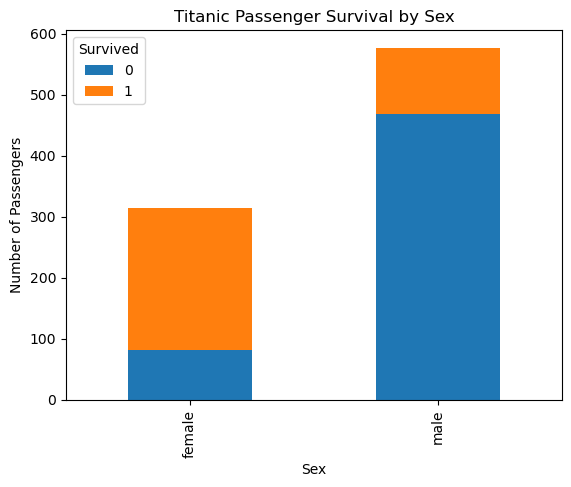

In [14]:
#make the figure
cross_tab_df.plot(kind='bar', stacked=True, title='Titanic Passenger Survival by Sex', ylabel='Number of Passengers')

Just for fun, we can see what would happen if we switched the order of 'Sex' and 'Survived' in the cross-tab.  What figure do you think does a better job illustrating the difference in survival for male and female passengers on the Titanic?

The second one where you flip the Sex and Survived where the male and female are easier to determine who surved and how many of each survived.

In [21]:
#calculate the cross-tab
cross_tab = pd.crosstab(df['Survived'],df['Sex'])

#Save it to its own dataframe using .DataFrame method
cross_tab_df=pd.DataFrame(cross_tab)

cross_tab_df


Sex,female,male
Survived,,
0,81,468
1,233,109


<Axes: title={'center': 'Titanic Passenger Survival by Sex'}, xlabel='Survived', ylabel='Number of Passengers'>

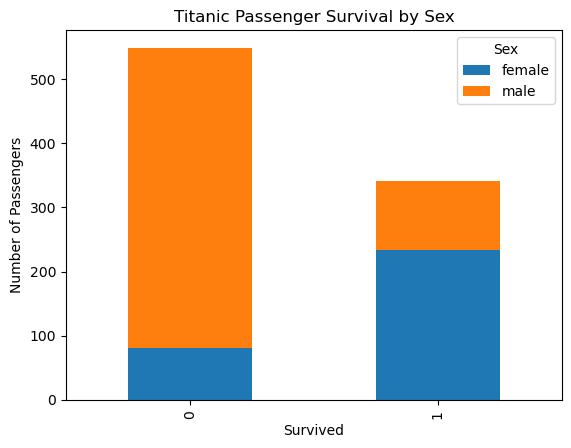

In [23]:
#make the figure
cross_tab_df.plot(kind='bar', stacked=True, title='Titanic Passenger Survival by Sex', ylabel='Number of Passengers')

## Let's make some small improvements

The last two graphs we made aren't bad, but they could be better.  We'll make some tweaks with the help of another Python package called `Matplotlib`.  `Matplotlib` is a powerful visualization package on its own, but we can also use it to improve visualizations we make with other packages such as `Pandas`.

By convention, we always import `matplotlib.pyplot` with the alias `plt`

In [25]:
import matplotlib.pyplot as plt

We can make changes to our plot using Matplotlib methods such as `plt.legend()`, `plt.title()`, and `plt.xticks()`.  Once we've made all of the changes we want to our plot, we show the final version of our visualization using `plt.show()`.

Let's look at our first bar chart with `Sex` on the x-axis and `Survived` making up the stacked bars.

In [29]:
#calculate the cross-tab
cross_tab = pd.crosstab(df['Sex'],df['Survived'])

#Save it to its own dataframe using .DataFrame method
cross_tab_df=pd.DataFrame(cross_tab)

cross_tab_df


Survived,0,1
Sex,,
female,81,233
male,468,109


Let's use `Matplotlib` to rotate and capitalize the x-axis labels to be more descriptive using `plt.xticks()`.

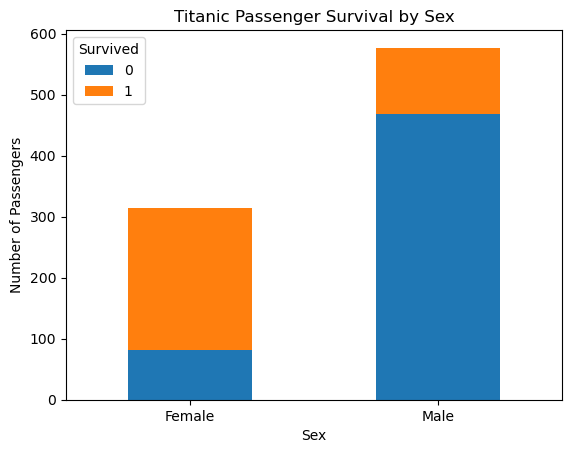

In [39]:
#make the figure
cross_tab_df.plot(kind='bar', stacked=True, title='Titanic Passenger Survival by Sex', ylabel='Number of Passengers')

#This data structure with brackets is a list. We are going to provide matplotlib with a list of labels for our legend.
current_lables=[0,1]
custom_lables=['Female','Male']
plt.xticks(current_lables, custom_lables, rotation=360)

#this prints the plot
plt.show()


Finally, let's give the figure a more descriptive legend.

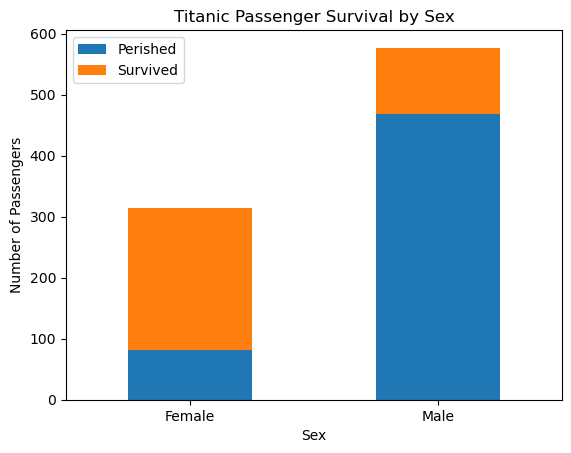

In [43]:
#make the figure
cross_tab_df.plot(kind='bar', stacked=True, title='Titanic Passenger Survival by Sex', ylabel='Number of Passengers')

#This data structure with brackets is a list. We are going to provide matplotlib with a list of labels for our legend.
current_lables=[0,1]
custom_lables=['Female','Male']
plt.xticks(current_lables, custom_lables, rotation=360)

#Create more descriptive legend labels
custom_legend_labels=['Perished','Survived']
plt.legend(custom_legend_labels)

#this prints the plot
plt.show()


## Conditional proportions

It's easy to see - in raw numbers - that more men than women perished and more women than men survived.

Let's look at a new pair of categorical features where the relationship is less straightforward: **Were individuals with parents and/or children with them on board more likely to survive than individuals who did not have parents and/or children with them?**

The `Parch` feature gives the number of parents and/or children who were traveling with the individual on the Titanic.

We can see that most people were traveling alone (`Parch = 0`) but some were traveling with a number of people.  

In [47]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

`Parch` is an ordinal, categorical feature.  However, to answer our question, we need to do some feature engineering so we have a feature that tells us *if* the passenger had parents and/or children with them aboard rather than *how many* parents and/or children were with them.  

To do this, we can create `Parch_cat` to indicate if there were (`Parch_cat = 1`) or were not (`Parch_cat` = 0) parents and/or children with the individual.

In [51]:
#Feature engineering 'Parch_cat'
df.loc[df['Parch']>0, 'Parch_cat']=1
df.loc[df['Parch']==0, 'Parch_cat']=0

df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Parch_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0.0


In [57]:
print(df['Parch_cat'].value_counts())

print('______________________')

print(df['Parch_cat'].value_counts(normalize=True)*100)

Parch_cat
0.0    678
1.0    213
Name: count, dtype: int64
______________________
Parch_cat
0.0    76.094276
1.0    23.905724
Name: proportion, dtype: float64


We can see that about 76% of people were traveling without parents and/or children and about 24% were traveling with parents and/or children.  Who was more likely to survive?  Let's look at a cross-tab:

In [59]:
pd.crosstab(df['Parch_cat'],df['Survived'])

Survived,0,1
Parch_cat,,
0.0,445,233
1.0,104,109


We see that a greater number of passengers without parents/children on board survived (233 vs 109) BUT a greater number of passengers without parents/children on board also perished (445 vs 104).  Did they do better?  Worse?  How can we tell?

Because there were many more passengers traveling without parents and/or children, rather than comparing the number of passengers who survived and didn't survive, we need to compare the conditional distribution of survival for those with and without parents/children.

## Conditional distributions

The conditional distribution of two categorical features tells us the proportion of individuals in one category that also fall in another category.  

For example: What proportion of passengers with parents and/or children with them survived?  

The word "of" is a clue that we want to look at the conditional distribution of survival given a passenger's companions (or lack thereof).  We can calculate the conditional distribution of one feature given the other by specifying `index` (for rows) or `columns` depending on your choice of "of" feature.


In [69]:
#calculate the cross-tab
cross_tab_df=pd.crosstab(df['Parch_cat'],df['Survived'],normalize='index')[1]*100

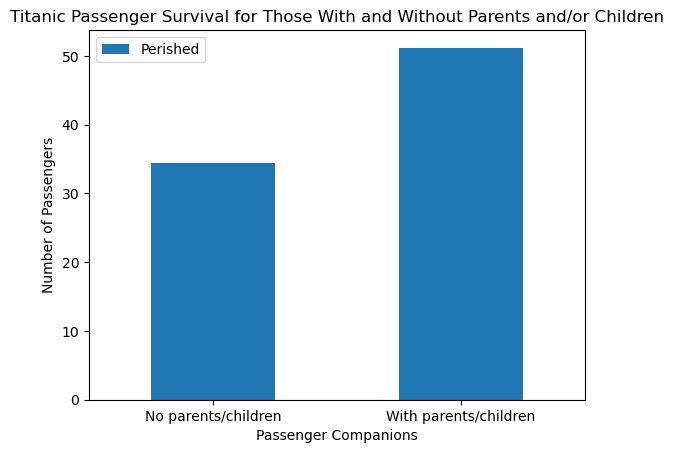

In [71]:
#calculate the cross-tab
cross_tab_df=pd.crosstab(df['Parch_cat'],df['Survived'],normalize='index')[1]*100

#make the figure
cross_tab_df.plot(kind='bar', stacked=True, title='Titanic Passenger Survival for Those With and Without Parents and/or Children', ylabel='Number of Passengers')

#label the x-axis
current_lables=[0,1]
custom_lables=['No parents/children','With parents/children']
plt.xticks(current_lables, custom_lables, rotation=360)
plt.xlabel('Passenger Companions')

#create more descriptive legend labels
custom_legend_labels=['Perished','Survived']
plt.legend(custom_legend_labels)

#this prints the plot
plt.show()

Now we are calculating the percent of passengers with parents/children who survived compared to the percent of passengers without parents/children who survived.  

**Using this comparison, which group seems more likely to survive?**

No Parents/Children

# Visualizing relationships between categorical features - A/B Testing

A/B testing, also known as split testing, is a method used to compare two versions of a web page, application, advertisement, or other marketing material to determine which one performs better. The essence of an A/B test is to conduct a controlled experiment with two variants, A and B, where A typically represents the current version (control), and B is the new version (test).

### Key Components of A/B Testing:

**Hypothesis Formation:** Before conducting an A/B test, a clear hypothesis is formed, predicting how the change in version B will impact a specific metric compared to version A.

**Randomized Assignment:** Users are randomly assigned to either the control group (A) or the test group (B) to eliminate selection bias. This randomization ensures that each group is statistically similar.

**Control and Variation:** The control group experiences the original version (A), while the variation group experiences the new version (B). The difference between these versions might be something as small as a color change in a button or as significant as a complete redesign.

**Measurement and Data Collection:** Data is collected on how users interact with each version. Key performance indicators (KPIs) such as conversion rates, click-through rates, engagement metrics, or other relevant metrics are measured.

**Statistical Analysis:** The results are analyzed statistically to determine if there is a significant difference in performance between the two versions. Tools like t-tests or analysis of variance (ANOVA) are commonly used for this purpose.

**Decision Making:** Based on the outcome of the analysis, a decision is made whether to adopt the new version, keep the existing one, or run additional tests.

### Applications of A/B Testing:

A/B testing is widely used in various fields such as marketing, web design, product development, and even in policy-making. In e-commerce, for instance, it can help determine the most effective design for a product page to maximize sales. In digital marketing, it can identify the most compelling ad copy to improve click-through rates.

### Benefits of A/B Testing:

**Data-Driven Decisions:** It helps in making decisions based on actual user data rather than assumptions.

**Improved User Engagement:** By testing different versions, one can understand what works best for the audience.

**Continuous Improvement:** It allows for iterative improvements, constantly optimizing user experience and performance.


### A/B Testing Dataset:

A large company with a substantial user base plans to increase sales through advertisement on its website. However, they are still undecided about whether the ads increase sales or not. In order to determine whether this is the case, customers were subjected to A/B testing for 31 days.

Columns:

**user id:** unique identifier for the customer

**test group:** composed of 96% 'ad' and 4% 'psa' group.

**converted:** A Boolean value representing whether or not the user made a purchase after seeing an advertisement.

**total ads:** total number of ads seen by each user.

**most ads day:** A day of the month when the user saw the most ads.

**most ads hour:** An hour of the day when the user saw the most ads.


**Were customers who viewed the ad more likely to convert than customers who viewed the PSA?**

In [74]:
df=pd.read_csv('assets/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [76]:
#Frequency of those in each condition
print(df['test group'].value_counts())
print(df['test group'].value_counts(normalize=True)*100)


test group
ad     564577
psa     23524
Name: count, dtype: int64
test group
ad     96.000007
psa     3.999993
Name: proportion, dtype: float64


In [80]:
#Frequency of thos who converted

print(df['converted'].value_counts())
print(df['converted'].value_counts(normalize=True)*100)


converted
False    573258
True      14843
Name: count, dtype: int64
converted
False    97.476114
True      2.523886
Name: proportion, dtype: float64


In [82]:
#Raw frequency of thos who coverted and churned

pd.crosstab(df['test group'],df['converted'])

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [84]:
#normalize on the test group
pd.crosstab(df['test group'],df['converted'], normalize='index')*100

converted,False,True
test group,,
ad,97.445344,2.554656
psa,98.214589,1.785411


**In which display - the stacked bar chart or the crosstab - was it easiest to compare the percent of individuals who saw the Ad and PSA and converted?**

Sometimes if differences are small in absolute terms (even if one value is greater than the other in a relative sense) a bar chart isn't the right display.

## Other visualizations of the relationship between two categorical features

### Mosiac Plot

A mosaic plot is a graphical method for visualizing the association between two categorical variables. It displays rectangles that are divided into smaller rectangles, where the area of each smaller rectangle is proportional to the joint frequency of the categories.


<img src="images/Mosaic-big.png">

By Seancarmody - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=7389833

## Sankey Diagram

A Sankey diagram can be used to visualize the flow or connection between two categorical variables. It's especially useful when showing the transition or distribution of data from one category to another.

<img src="images/sankey diagram.png">
https://www.sankeyart.com/content/blog/why-a-sankey-diagram-is-the-best-way-to-visualize-an-income-statement/

## Venn Diagram

Venn diagrams can be used to visualize the overlap or common elements between two categorical features when they are sets or categories.

<img src="images/Venn_diagram_example.png">

Lesabot, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

## Graphics styles

One final thing that's fun to play with: You can change the entire display style of a figure using Matplotlib.  Running the code block below gives a list of different styles available.  You'll see that "seaborn" comes up a lot.  That's a plotting library that we will use in the future.  People really like the style of Seaborn graphics.

In [86]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [90]:
plt.style.use('seaborn-v0_8-muted')


Explore the features of Matplotlib that we discussed in class and feel free to Google to see what other features exist.  There are probably thousands!